### IDs:
Insert yours IDs to the cell below

ID #1: 203972922

ID #2: 201312907

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

## Imports

In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as st
import pandas as pd
from scipy.stats import multivariate_normal as mn

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

In [2]:
def print_table_and_jointplot(x, y):
    # Print a table of the exsmple data
    table = pd.DataFrame(np.vstack((x,y)).T, columns = ['x', 'y'])
    print(table)
    
    # PLot out a joint plot
    p = sns.jointplot(data=table, x=x, y=y, marker='*')
    p.fig.suptitle('x & y values JointPlot', fontsize=25)
    p.fig.subplots_adjust(top=0.9) # Reduce plot to make room for title
    p.set_axis_labels(xlabel = 'X', ylabel= 'Y')


n = 50 # 50 datapoints

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

Pearson correlation between x & y all sampels -1.0
Pearson correlation between x & y all sampels except last ellement 1.0
            x          y
0     0.00000    0.00000
1     0.00000    0.00000
2     0.00000    0.00000
3     0.00000    0.00000
4     0.00000    0.00000
5     0.00000    0.00000
6     0.00000    0.00000
7     0.00000    0.00000
8     0.00000    0.00000
9     0.00000    0.00000
10    0.00000    0.00000
11    0.00000    0.00000
12    0.00000    0.00000
13    0.00000    0.00000
14    0.00000    0.00000
15    0.00000    0.00000
16    0.00000    0.00000
17    0.00000    0.00000
18    0.00000    0.00000
19    0.00000    0.00000
20    0.00000    0.00000
21    0.00000    0.00000
22    0.00000    0.00000
23    0.00000    0.00000
24    0.00000    0.00000
25    0.00000    0.00000
26    0.00000    0.00000
27    0.00000    0.00000
28    0.00000    0.00000
29    0.00000    0.00000
30    0.00000    0.00000
31    0.00000    0.00000
32    0.00000    0.00000
33    0.00000    0.00000
34 

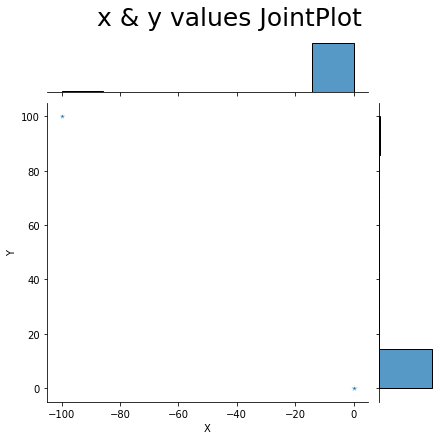

In [3]:
x = np.zeros(n)
y = np.zeros(n)

#
x[n-2] = 1e-5
y[n-2] = 1e-5

# these are the last values we will exclude
x[n-1] = -100
y[n-1] = 100

all_data_correlation = st.pearsonr(x, y)[0]
partial_correlation = st.pearsonr(x[:n-1], y[:n-1])[0]

S1 = 'Pearson correlation between x & y all sampels ' + str(np.round(all_data_correlation,3))
S2 = 'Pearson correlation between x & y all sampels except last ellement ' + str(np.round(partial_correlation,3))
print(S1 + '\n' + S2)

print_table_and_jointplot(x, y)

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

we design x,y such that they will assembel 2 linear line with a same positive slope
by doing that we assume to achieve negative correlaction value, because of the way we build
the two line, the kendal score will be small negative number (there is more discordant than concordant)
$ \tau = \frac{C-D}{n/2} $

kendall correlation between x & y all sampels -0.02
spearman correlation between x & y all sampels -0.501
kendall correlation - spearman correlation is 0.48, which is greater than 0.45
       x     y
0    1.0  51.0
1    2.0  52.0
2    3.0  53.0
3    4.0  54.0
4    5.0  55.0
5    6.0  56.0
6    7.0  57.0
7    8.0  58.0
8    9.0  59.0
9   10.0  60.0
10  11.0  61.0
11  12.0  62.0
12  13.0  63.0
13  14.0  64.0
14  15.0  65.0
15  16.0  66.0
16  17.0  67.0
17  18.0  68.0
18  19.0  69.0
19  20.0  70.0
20  21.0  71.0
21  22.0  72.0
22  23.0  73.0
23  24.0  74.0
24  25.0  75.0
25  26.0   1.0
26  27.0   2.0
27  28.0   3.0
28  29.0   4.0
29  30.0   5.0
30  31.0   6.0
31  32.0   7.0
32  33.0   8.0
33  34.0   9.0
34  35.0  10.0
35  36.0  11.0
36  37.0  12.0
37  38.0  13.0
38  39.0  14.0
39  40.0  15.0
40  41.0  16.0
41  42.0  17.0
42  43.0  18.0
43  44.0  19.0
44  45.0  20.0
45  46.0  21.0
46  47.0  22.0
47  48.0  23.0
48  49.0  24.0
49  50.0  25.0


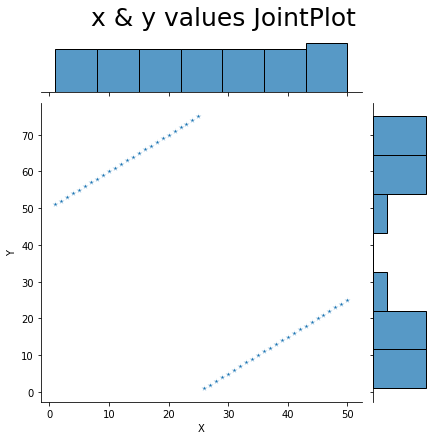

In [4]:
n = 50 # 50 datapoints


x = np.arange(n) + 1
y = np.empty(n)

y[0:n//2] = (np.arange(n//2) + 1) + 50
y[n//2:] = (np.arange(n//2) + 1)

kendall_correlation = st.kendalltau(x, y)[0]
spearman_correlation = st.spearmanr(x, y)[0]
diff_of_correlations = kendall_correlation-spearman_correlation



S1 = 'kendall correlation between x & y all sampels ' + str(np.round(kendall_correlation,3))
S2 = 'spearman correlation between x & y all sampels ' + str(np.round(spearman_correlation,3))
S3 = 'kendall correlation - spearman correlation is ' + str(np.round(diff_of_correlations,3)) +', which is greater than 0.45'

print(S1 + '\n' + S2 +'\n' +S3)

print_table_and_jointplot(x, y)

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

we design x,y such that they will assembel 2 linear line with a same negative slope
by doing that we assume to achieve positive correlaction value, because of the way we build
the two line, the kendal score will be small positive number (there is more concordant than discordant)
$ \tau = \frac{C-D}{n/2} $

kendall correlation between x & y all sampels 0.02
spearman correlation between x & y all sampels 0.501
kendall correlation - spearman correlation is -0.48, which is greater than -0.45
       x      y
0    1.0   25.0
1    2.0   24.0
2    3.0   23.0
3    4.0   22.0
4    5.0   21.0
5    6.0   20.0
6    7.0   19.0
7    8.0   18.0
8    9.0   17.0
9   10.0   16.0
10  11.0   15.0
11  12.0   14.0
12  13.0   13.0
13  14.0   12.0
14  15.0   11.0
15  16.0   10.0
16  17.0    9.0
17  18.0    8.0
18  19.0    7.0
19  20.0    6.0
20  21.0    5.0
21  22.0    4.0
22  23.0    3.0
23  24.0    2.0
24  25.0    1.0
25  26.0  125.0
26  27.0  124.0
27  28.0  123.0
28  29.0  122.0
29  30.0  121.0
30  31.0  120.0
31  32.0  119.0
32  33.0  118.0
33  34.0  117.0
34  35.0  116.0
35  36.0  115.0
36  37.0  114.0
37  38.0  113.0
38  39.0  112.0
39  40.0  111.0
40  41.0  110.0
41  42.0  109.0
42  43.0  108.0
43  44.0  107.0
44  45.0  106.0
45  46.0  105.0
46  47.0  104.0
47  48.0  103.0
48  49.0  102.0
49  50.0  101.0

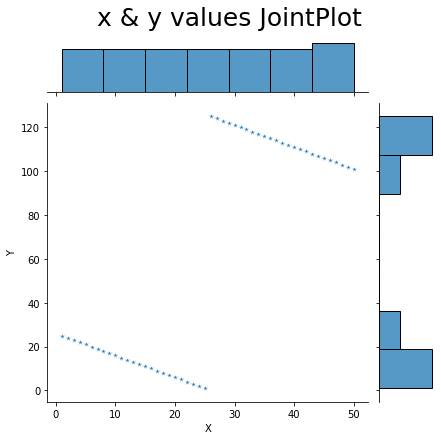

In [5]:
x = np.arange(n) + 1
y = np.empty(n)

y[0:n//2] = (np.arange(n//2) + 1)[::-1]
y[n//2:] = (np.arange(n//2) + 1)[::-1]+ 100

kendall_correlation = st.kendalltau(x, y)[0]
spearman_correlation = st.spearmanr(x, y)[0]
diff_of_correlations = kendall_correlation-spearman_correlation



S1 = 'kendall correlation between x & y all sampels ' + str(np.round(kendall_correlation,3))
S2 = 'spearman correlation between x & y all sampels ' + str(np.round(spearman_correlation,3))
S3 = 'kendall correlation - spearman correlation is ' + str(np.round(diff_of_correlations,3)) +', which is greater than -0.45'


print(S1 + '\n' + S2 +'\n' +S3)

print_table_and_jointplot(x, y)

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

In [6]:
# TODO: show or. not working for me
# x = np.linspace(start=1, stop=50, num=50)
# y = 10**x # exponential function

# pearson_correlation = st.pearsonr(x, y)[0]
# spearman_correlation = st.spearmanr(x, y)[0]
# diff_of_correlations = spearman_correlation - pearson_correlation

# S1 = 'pearson_correlation between x & y all sampels ' + str(np.round(pearson_correlation,3))
# S2 = 'spearman correlation between x & y all sampels ' + str(np.round(spearman_correlation,3))
# S3 = 'spearman correlation - pearson_correlation -  is ' + str(np.round(diff_of_correlations,3)) +', which is greater than 0.6'

# print(S1 + '\n' + S2 +'\n' +S3)

# print_table_and_jointplot(x, y)

ERROR! Session/line number was not unique in database. History logging moved to new session 87


#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

we design array that contain negative linear line, in order to convert spearman to
be negative, we take that last ellement to be large dramiticaly in both axis, by that we
convert person correlation to be positive, and sprearman correlation to negative, because
all the difference until n-1 ellement are small, and the last difference is dramitcly positive

pearson_correlation between x & y all sampels 1.0
spearman correlation between x & y all sampels -0.882
pearson_correlation - spearman correlation is 1.882, which is greater than 1.2
          x        y
0       1.0     50.0
1       2.0     49.0
2       3.0     48.0
3       4.0     47.0
4       5.0     46.0
5       6.0     45.0
6       7.0     44.0
7       8.0     43.0
8       9.0     42.0
9      10.0     41.0
10     11.0     40.0
11     12.0     39.0
12     13.0     38.0
13     14.0     37.0
14     15.0     36.0
15     16.0     35.0
16     17.0     34.0
17     18.0     33.0
18     19.0     32.0
19     20.0     31.0
20     21.0     30.0
21     22.0     29.0
22     23.0     28.0
23     24.0     27.0
24     25.0     26.0
25     26.0     25.0
26     27.0     24.0
27     28.0     23.0
28     29.0     22.0
29     30.0     21.0
30     31.0     20.0
31     32.0     19.0
32     33.0     18.0
33     34.0     17.0
34     35.0     16.0
35     36.0     15.0
36     37.0     14.0
37     38.0     13.

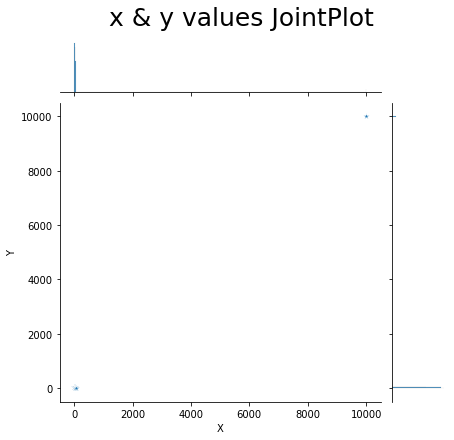

In [7]:
x = np.arange(n) + 1
y = np.linspace(50, 1, num=n)

x[n-1] = 10000
y[n-1] = 10000

pearson_correlation = st.pearsonr(x, y)[0]
spearman_correlation = st.spearmanr(x, y)[0]
diff_of_correlations = pearson_correlation- spearman_correlation

S1 = 'pearson_correlation between x & y all sampels ' + str(np.round(pearson_correlation,3))
S2 = 'spearman correlation between x & y all sampels ' + str(np.round(spearman_correlation,3))
S3 = 'pearson_correlation - spearman correlation is ' + str(np.round(diff_of_correlations,3)) +', which is greater than 1.2'
print(S1 + '\n' + S2 +'\n' +S3)
print_table_and_jointplot(x, y)

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

This scenario is not possible
our intuition:
in order that the differance between spearman to kendal to be greater than 1.2,
the kendal and spreaman needed to be in differnt signs, Kendall and Spearman will have can have different signs,
however the difference between there score base on privious 1.b,1.c base on our exipirements, the difference
between tham cannot pass 0.5, therefore it can't pass 1.2
if we will look on the extreame of spearman an kendal correlation, they needed to behave the same:
if Spearman = 1.0 --> all the data is monotonically increasing and all the ranks agree, --> in Kendall notation
all the pairs are concordant, so Kendall will also equal 1
if Kendall = -1.0 --> all the pairs are discordant--> all the data is monotonically decreasing -->
Spearman will also equal -1

### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


In [25]:
# Example code for bivariate pdfs
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov, feature_name1, feature_name2):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
                alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.title('2d Gaussian pdf between ' + feature_name1 + ' to ' + feature_name2)
    plt.xlabel(feature_name1)
    plt.ylabel(feature_name2)
    plt.show()

In [26]:
path_roy = 'heart.csv'
path_or = r"D:\HW3\heart.csv"
df = pd.read_csv(path_roy, index_col=False, sep='\t')

### First basic prints of the data

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1


In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,295.000000,299.000000,298.000000,297.000000,297.000000,300.000000,301.000000,299.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000
mean,54.389831,0.682274,0.969799,131.663300,245.966330,0.150000,0.521595,149.565217,0.326733,1.040604,1.399340,0.729373,2.313531,0.544554
std,9.084668,0.466373,1.032678,17.532242,52.117969,0.357668,0.519967,23.008131,0.469794,1.167458,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [29]:
df_info = df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       295 non-null    float64
 1   sex       299 non-null    float64
 2   cp        298 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       300 non-null    float64
 6   restecg   301 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 33.3 KB


### Q2 Bullet 0
* There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).

In [30]:
print(f'number of na values before assignment')
df.isna().sum()

number of na values before assignment


age         8
sex         4
cp          5
trestbps    6
chol        6
fbs         3
restecg     2
thalach     4
exang       0
oldpeak     5
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
categorical_columns  = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
df_columns_list = df.columns.to_list()

numerical_feature_columns = np.array(list(set(df_columns_list)-set(categorical_columns)))

numerical_feature_df = df[numerical_feature_columns]
categorical_feature_df = df[categorical_columns]

# numerical_feature_columns = numerical_feature_df.columns.to_numpy()

print(f'categorical feature columns {categorical_columns}')
print(f'numerical feature columns {numerical_feature_columns}')

categorical feature columns ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numerical feature columns ['age' 'oldpeak' 'chol' 'thalach' 'trestbps']


In [32]:
df_describe = df.describe(include='all')
df_median = df_describe.loc['50%']
df_mean = df_describe.loc['mean']

for i_col in numerical_feature_columns:
    df[i_col].fillna(df_median[i_col], inplace = True)
for i_col in categorical_columns:
    mode = scipy.stats.mode(df[i_col].to_list()).mode[0]
    df[i_col].fillna(mode, inplace = True)

In [33]:
print(f'number of na values after assignment')
df.isna().sum()

number of na values after assignment


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Q2 Bullet 1
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean

In [35]:
healthy = (categorical_feature_df['target']==1)
disease = ~healthy

healthy_numerical_feature_df = numerical_feature_df.loc[healthy] # seek
disease_numerical_feature_df = numerical_feature_df.loc[disease]
alpha =0.05
summary_string = 'confidence interval for all feature, aprove or decline null model:\n'
for i_col_index in range(numerical_feature_columns.__len__()):
    i_col = numerical_feature_columns[i_col_index]
    healthy_numerical_feature_array = healthy_numerical_feature_df[i_col].to_numpy()
    disease_numerical_feature_array = disease_numerical_feature_df[i_col].to_numpy()

    target1_mue = np.mean(healthy_numerical_feature_array)
    target0_mue = np.mean(disease_numerical_feature_array)

    target1_std = np.std(healthy_numerical_feature_array)
    target0_std = np.std(disease_numerical_feature_array)

    means_diff  = (target0_mue-target1_mue)
    z_ppf = scipy.stats.norm.ppf(1-alpha/2)
    SE = np.sqrt(((target1_std**2)/healthy_numerical_feature_df.shape[0] + (target0_std**2)/disease_numerical_feature_df.shape[0]))
    larger_of_smaller_indicator = 'larger' if target0_mue > target1_mue else 'smaller'
    top  = means_diff  + SE*z_ppf
    bottom  = means_diff  - SE*z_ppf
    if not bottom <= 0 <= top:
        curr_string = str(i_col_index)+ ') for ' + i_col+ ' feature ' + \
        'the healthy sample mean is '+ larger_of_smaller_indicator + ' than the disease sample mean with confidence of 95%\n' 
    else:
        curr_string = str(i_col_index)+ ') for ' + i_col+ ' feature ' + \
        'Not enough confidence to reject the null hypothesis (that the healthy sample mean = disease sample mean)\n' 
    
    
    summary_string+=curr_string


print(summary_string)


confidence interval for all feature, aprove or decline null model:
0) for age feature the healthy sample mean is smaller than the disease sample mean with confidence of 95%
1) for oldpeak feature the healthy sample mean is smaller than the disease sample mean with confidence of 95%
2) for chol feature the healthy sample mean is smaller than the disease sample mean with confidence of 95%
3) for thalach feature the healthy sample mean is smaller than the disease sample mean with confidence of 95%
4) for trestbps feature the healthy sample mean is smaller than the disease sample mean with confidence of 95%



### Q2 Bullet 2
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.

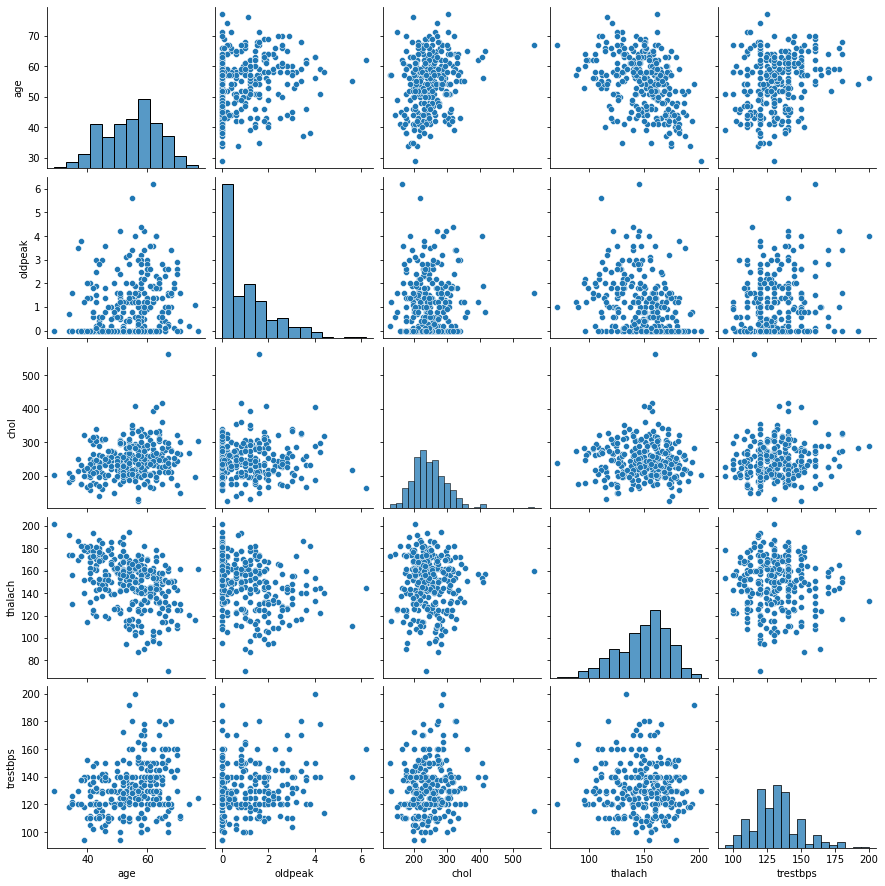

In [36]:
sns.pairplot(numerical_feature_df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

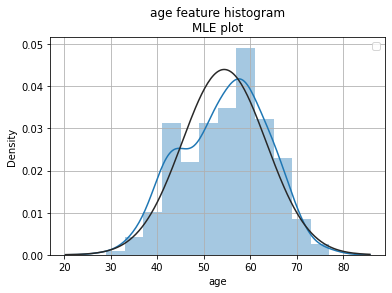

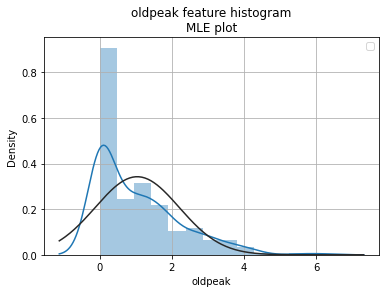

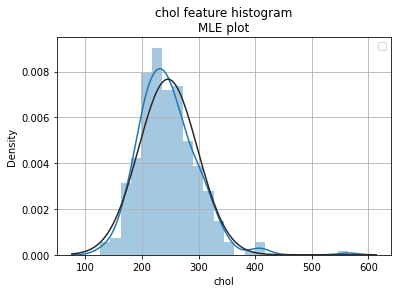

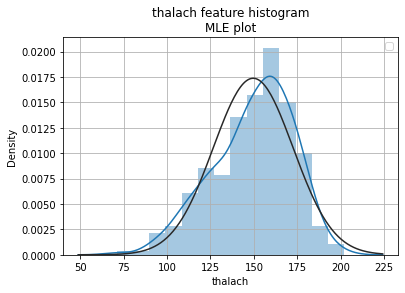

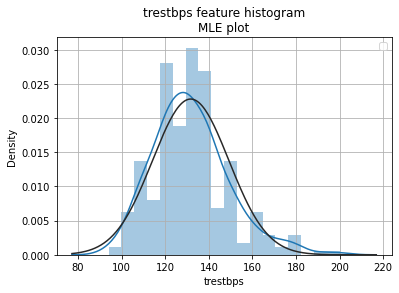

In [41]:
for i_col in numerical_feature_columns:
    plt.figure()
    sns.distplot(numerical_feature_df[i_col], fit = scipy.stats.norm)
    plt.legend()
    plt.grid()
    plt.title(i_col + ' feature histogram\nMLE plot')

### Q2 Bullet 3
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).

Text(0.5, 1.0, 'Correlation matrix of all the numerical features')

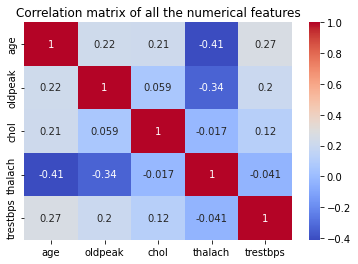

In [38]:
plt.figure()
sns.heatmap(numerical_feature_df.corr(), cmap='coolwarm', annot=True)
plt.title(f'Correlation matrix of all the numerical features')

In [42]:
corr_array = numerical_feature_df.corr().to_numpy()
np.fill_diagonal(corr_array, 0)
max_corr_row_col = np.where(corr_array == np.max(corr_array))[0]
min_corr_row_col = np.where(corr_array == np.min(corr_array))[0]

In [43]:
min_cor_features = numerical_feature_columns[min_corr_row_col].tolist()
max_cor_features = numerical_feature_columns[max_corr_row_col].tolist()

string = 'The min corroletion found was between feature ' + min_cor_features[0] + ' to feature ' \
+ min_cor_features[1]
print(string)

string = 'The max corroletion found was between feature ' + max_cor_features[0] + ' to feature ' \
+ max_cor_features[1]
print(string)

The min corroletion found was between feature age to feature thalach
The max corroletion found was between feature age to feature trestbps


> after finding the most signifcant correlations, we will show a joint plot and a 2d gausian pdf for them

>> Maximum correlation

Text(0.5, 0.98, 'joint distribution between age to trestbps\n minimum min correlation')

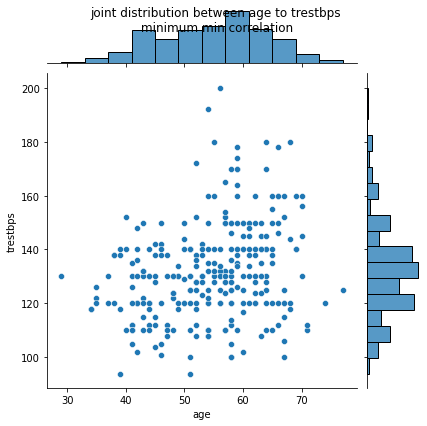

In [44]:
ax= sns.jointplot(data = numerical_feature_df,x = max_cor_features[0], y= max_cor_features[1])
ax.fig.suptitle('joint distribution between '+max_cor_features[0]+' to ' + max_cor_features[1] + '\n minimum min correlation')

In [45]:
means = [df_mean[max_cor_features[0]],df_mean[max_cor_features[1]]]
cov = np.cov(numerical_feature_df[max_cor_features[0]].to_list(), numerical_feature_df[max_cor_features[1]].to_list())
plot_2d_Gaussian_pdf(means, cov.tolist() , max_cor_features[0], max_cor_features[1])

ValueError: array must not contain infs or NaNs

>> Minimum correlation

Text(0.5, 0.98, 'joint distribution between age to thalach\n maximum min correlation')

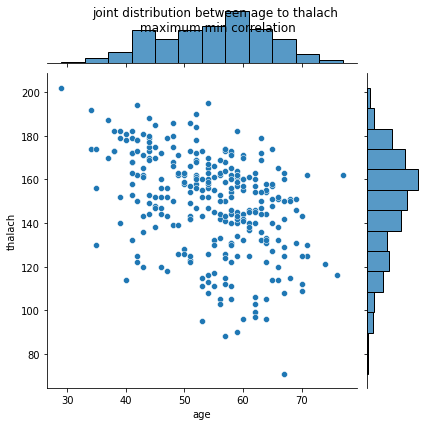

In [46]:
ax= sns.jointplot(data = numerical_feature_df,x = min_cor_features[0], y= min_cor_features[1])
ax.fig.suptitle('joint distribution between '+min_cor_features[0]+' to ' + min_cor_features[1] + '\n maximum min correlation')

In [47]:
means = [df_mean[min_cor_features[0]],df_mean[min_cor_features[1]]]
cov = np.cov(numerical_feature_df[min_cor_features[0]].to_list(), numerical_feature_df[min_cor_features[1]].to_list())
plot_2d_Gaussian_pdf(means, cov.tolist() , min_cor_features[0], min_cor_features[1])

ValueError: array must not contain infs or NaNs

### Q2 Bullet 4
* Are there pairs that are significantly correlated in males but not in femalees? The opposite? How about healthy vs disease? Can you graphically represent this?

> Male .vs. Female

In [48]:
male = (categorical_feature_df['sex']==1) #male
female = ~male # female

male_numerical_feature_df = numerical_feature_df.loc[male] # seek
female_numerical_feature_df = numerical_feature_df.loc[female]

Text(0.5, 1.0, 'Correlation matrix of all the male features')

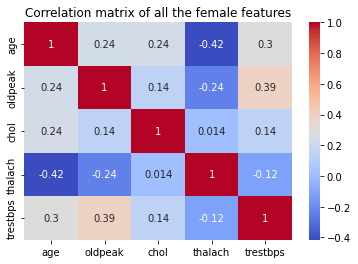

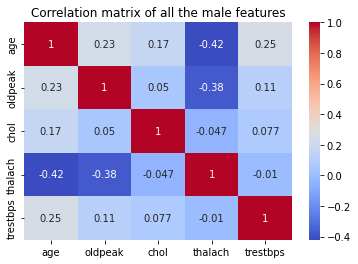

In [49]:
plt.figure()
sns.heatmap(female_numerical_feature_df.corr(), cmap='coolwarm', annot=True)
plt.title(f'Correlation matrix of all the female features')

plt.figure()
sns.heatmap(male_numerical_feature_df.corr(), cmap='coolwarm', annot=True)
plt.title(f'Correlation matrix of all the male features')

In [50]:
female_corr_array = female_numerical_feature_df.corr().to_numpy()
male_corr_array = male_numerical_feature_df.corr().to_numpy()

male_diff_famale =np.abs( male_corr_array- female_corr_array)

max_corr_row_col = np.where(male_diff_famale == np.max(male_diff_famale))[0]
min_corr_row_col = np.where(male_diff_famale == np.min(male_diff_famale))[0]

In [51]:
max_cor_features = numerical_feature_columns[max_corr_row_col].tolist()

string = 'The max correlation found was between feature ' + max_cor_features[0] + ' to feature ' \
+ max_cor_features[1]
print(string)

array1 = numerical_feature_df[max_cor_features[0]].to_list()
array2 = numerical_feature_df[max_cor_features[1]].to_list()
corr, p_value = scipy.stats.pearsonr(array1, array2)
print(f'and the p-value is  {p_value}')

The max correlation found was between feature oldpeak to feature trestbps


ValueError: array must not contain infs or NaNs

In [52]:
# min_cor_features = numerical_feature_columns[min_corr_row_col].tolist()

# string = 'The min correlation found was between feature ' + min_cor_features[0] + ' to feature ' \
# + min_cor_features[1]
# print(string)

> Healty .vs. Sick

In [53]:
healthy = (categorical_feature_df['target']==0)
disease = ~healthy

healthy_numerical_feature_df = numerical_feature_df.loc[healthy] # seek
disease_numerical_feature_df = numerical_feature_df.loc[disease]

Text(0.5, 1.0, 'Correlation matrix of all the healthy features')

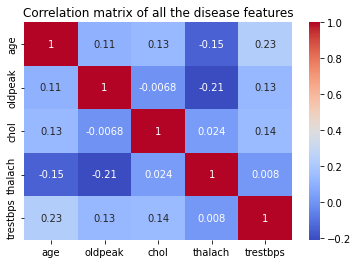

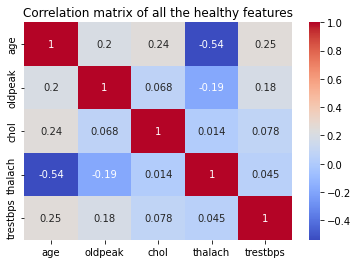

In [54]:
plt.figure()
sns.heatmap(healthy_numerical_feature_df.corr(), cmap='coolwarm', annot=True)
plt.title(f'Correlation matrix of all the disease features')

plt.figure()
sns.heatmap(disease_numerical_feature_df.corr(), cmap='coolwarm', annot=True)
plt.title(f'Correlation matrix of all the healthy features')

In [55]:
healthy_corr_array = healthy_numerical_feature_df.corr().to_numpy()
disease_corr_array = disease_numerical_feature_df.corr().to_numpy()

healthy_diff_disease =np.abs( healthy_corr_array- disease_corr_array)

max_corr_row_col = np.where(healthy_diff_disease == np.max(healthy_diff_disease))[0]
min_corr_row_col = np.where(healthy_diff_disease == np.min(healthy_diff_disease))[0]

In [56]:
max_cor_features = numerical_feature_columns[max_corr_row_col].tolist()

string = 'The max correlation found was between feature ' + max_cor_features[0] + ' to feature ' \
+ max_cor_features[1]
print(string)

array1 = numerical_feature_df[max_cor_features[0]].to_list()
array2 = numerical_feature_df[max_cor_features[1]].to_list()
corr, p_value = scipy.stats.pearsonr(array1, array2)
print(f'and the p-value is  {p_value}')

The max correlation found was between feature age to feature thalach


ValueError: array must not contain infs or NaNs

In [ ]:
# min_cor_features = numerical_feature_columns[min_corr_row_col].tolist()

# string = 'The min correlation found was between feature ' + min_cor_features[0] + ' to feature ' \
# + min_cor_features[1]
# print(string)

### Q2 Bullet 5
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

In [57]:
numerical_feature_columns_with_target = numerical_feature_columns.tolist() + ['target']

df_violin = df[numerical_feature_columns_with_target]

df_violin.loc[healthy, 'target'] = 'healthy' 
df_violin.loc[disease, 'target'] = 'disease'  

bins = np.array([20, 40, 60, 80])
df_violin['age'] = pd.cut(x=df.age, bins=bins)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/var/folders/0f/27_6jz_d76qdtz0_10p1wjxr0000gp/T/ipykernel_2789/412134457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_violin['age'] = pd.cut(x=df.age, bins=bins)


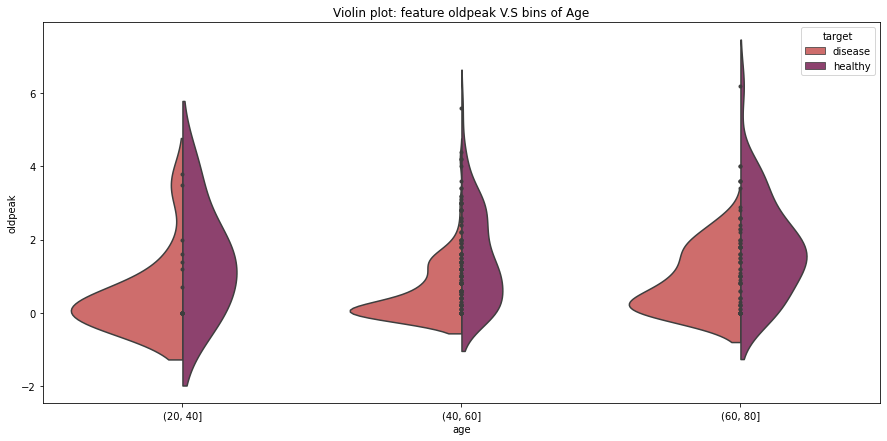

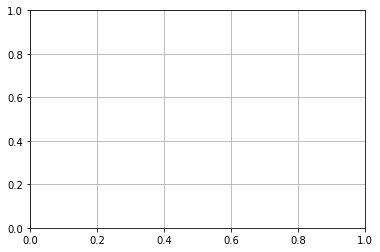

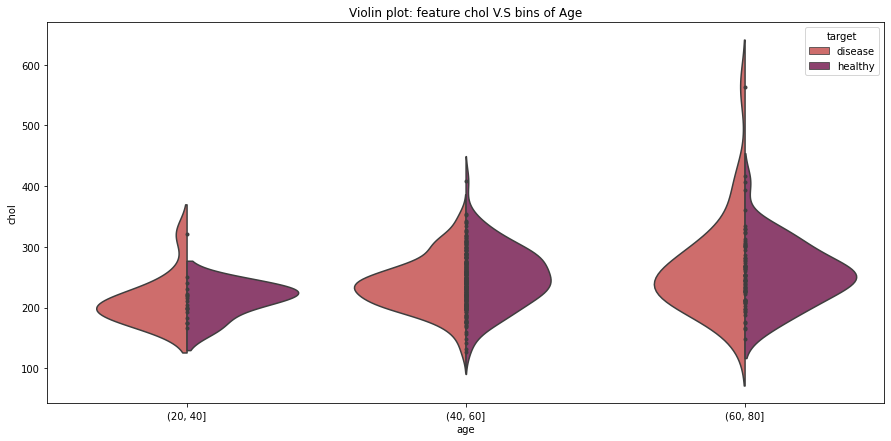

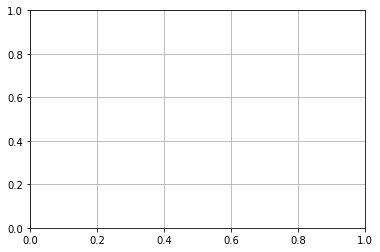

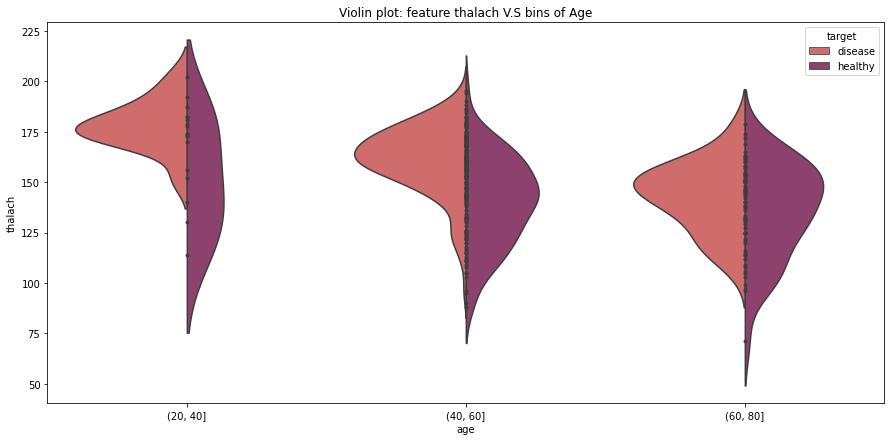

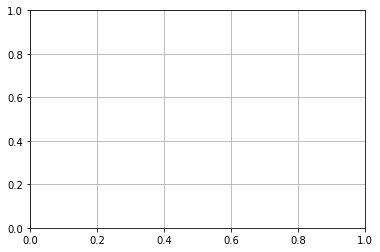

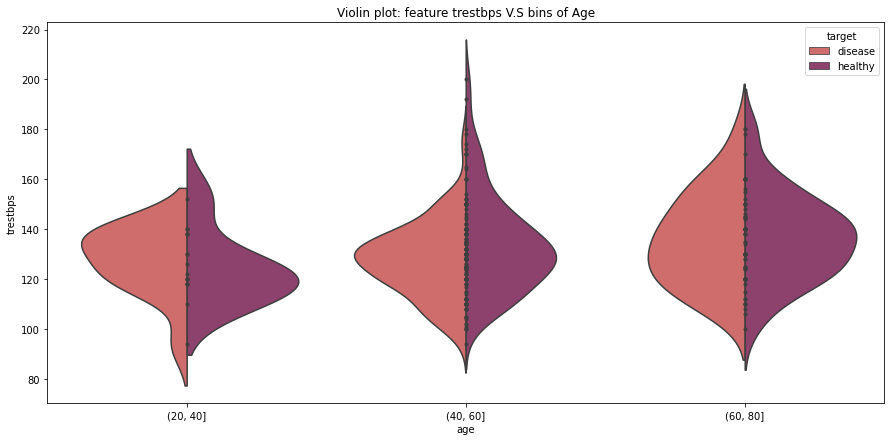

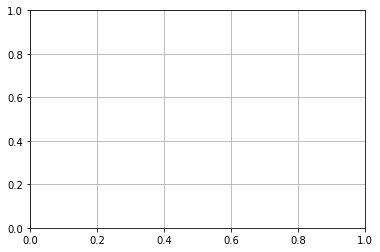

In [58]:
for f in numerical_feature_columns_with_target:
    if f in ['target', 'age']:
        continue
    plt.figure(figsize=(15, 7))
    g = sns.violinplot(x='age', y=f, data=df_violin, hue='target',split=True, palette="flare", inner='point')
    #title = f'Age VS {f} ({desc})' if desc else f'Age VS {f}'
    plt.title('Violin plot: feature ' + f + ' V.S bins of Age')
    plt.show()
    plt.grid()

### Q2 Bullet 6
* Suggest, state and address at least one original question.

#### Our Original Question:
> we would like to know which numerical features have high and low probabilities to indicate whether a patient is sick or healthy.

> we used a heatmap to plot the correlation matrix with the target feature.  

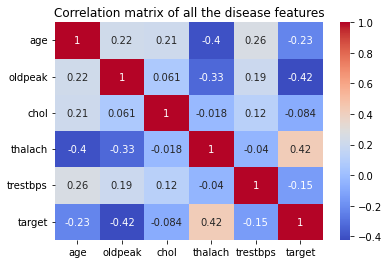

In [59]:
df_violin = df[numerical_feature_columns_with_target]

plt.figure()
sns.heatmap(df_violin.corr(), cmap='coolwarm', annot=True)
plt.title(f'Correlation matrix of all the disease features')

array1 = df_violin['age'].to_list()
array2 = df_violin['target'].to_list()
corr, p_value = scipy.stats.pearsonr(array1, array2)

array1 = df_violin['thalach'].to_list()
array2 = df_violin['target'].to_list()
corr, p_value = scipy.stats.pearsonr(array1, array2)

> from our plot we can caonclude that:

>> 1. the "thalach" feature is significant in positive correlation to the target. we can also see that the p-value is very low (e-14). this makes sense, becuase the thalach feature actually means "maximum heart rate acheived". the higher this value is, the more likely it is for the patient to have the disease.

>> 2. the "age" feature is negatively correlated to the target. we can also see it has low p value (e-5). this also makes sense, because the younger the patient is, the less likely it is for the patient to have the disease.

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (15 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

##### Answer:
<b>As mentioned in the lecture, The standard log-normal distribution DOES have a heavy right tail<b>.<br>

<u>Proof</u>:<br>
Let $Y = e^{X}$ be a standard log-normal distribution random variable (where X is the standard normal).<br>

We will start from  $ \lim_{x\to\infty} e^{tx}P(Y > x)  $
And we will show that  $ \lim_{x\to\infty} e^{tx}P(Y > x) = \infty $

    
$$
\lim_{x\to\infty} e^{tx}P(Y > x) = 
\lim_{x\to\infty} e^{tx}\big(1-P(Y \leq x)\big) \stackrel{Y=e^X}{=} 
\lim_{x\to\infty} e^{tx}\big(1-P(e^X \leq x)\big) \stackrel{ln-both-sides}{=}
$$
    
$$
\lim_{x\to\infty} e^{tx}\big(1-P(X \leq ln x)\big) \stackrel{CDF-definition}{=}
\lim_{x\to\infty} e^{tx}\big(1-\Phi(ln x)\big) \stackrel{a^b = \frac{1}{a^{-b}}}{=} 
\lim_{x\to\infty} \frac{1-\Phi(ln x)}{e^{-tx}} \stackrel{LHopital \frac{0}{0}}{=} 
$$

$$
\lim_{x\to\infty} \frac{-\Phi(ln x)}{-t\cdot e^{-tx}} \stackrel{standard-normal-PDF}{=}
\lim_{x\to\infty} \frac{\frac{\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2} (ln x)^2}}{x}}{t \cdot e^{-tx}} = 
\lim_{x\to\infty} \frac{e^{-\frac{1}{2} (ln x)^2}}{\sqrt{2\pi} \cdot x \cdot t\cdot e^{-tx}} \stackrel{reorder}{=}
\lim_{x\to\infty} \frac{e^{tx}} {\sqrt{2\pi} \cdot t \cdot x \cdot e^{\frac {(ln x)^2}{2}}} \stackrel{reorder}{=}
$$

$$
\lim_{x\to\infty} \frac{1}{\sqrt{2\pi} \cdot t \cdot x} \cdot e^{t \cdot x - \frac{(ln x)^2}{2}} \approx
\frac{1}{\to 0} \cdot e^{\infty} \approx \infty \cdot \infty \approx \infty
$$



### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

### Question 4 - CLT for Markov chains (15 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [ ]:
def get_single_trajectory(trajectory_size: int, T: np.ndarray, pi_0: np.ndarray) -> list:
    dice_values = [1,2,3,4,5,6]
    
    first_roll = np.random.choice(dice_values, size=1, p=pi_0).item()
    
    trajectory = [first_roll]
    previous_roll = first_roll
    current_roll = None
    
    for iteration in range(1, trajectory_size):
        previous_roll_index = previous_roll - 1
        current_roll = np.random.choice(dice_values, size=1, p=T[previous_roll_index][:]).item()
        # print(f'previous_roll {previous_roll} so current probabilities are {T[previous_roll_index][:]} and current roll is {current_roll}')
        trajectory.append(current_roll)
        previous_roll = current_roll
    
    return trajectory

In [ ]:
def get_trajectory_means(number_of_trajectories: int, trajectory_size: int, T: np.ndarray, pi_0: np.ndarray) -> list:
    trajectory_means_list = []
    for iteration in range(number_of_trajectories):
        trajectory = get_single_trajectory(trajectory_size=trajectory_size, T=T, pi_0=pi_0)
        # print(f'current trajectory {trajectory}')
        trajectory_means_list.append(np.mean(trajectory))
        
    return trajectory_means_list

In [ ]:
pi_0 = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

T = np.array([[0.4, 0.2, 0.1, 0, 0.1, 0.2],
              [0.2, 0.4, 0.2, 0.1, 0, 0.1],
              [0.1, 0.2, 0.4, 0.2, 0.1, 0],
              [0, 0.1, 0.2, 0.4, 0.2, 0.1],
              [0.1, 0, 0.1, 0.2, 0.4, 0.2],
              [0.2, 0.1, 0, 0.1, 0.2, 0.4]])

In [ ]:
%%time
number_of_trajectories = 1000
trajectory_size = 30
trajectory_means1 = get_trajectory_means(number_of_trajectories=number_of_trajectories, 
                                         trajectory_size=trajectory_size, 
                                         T=T, 
                                         pi_0=pi_0)
# print(trajectory_means)

In [ ]:
print(f'empirical mean {np.mean(trajectory_means1)}')
print(f'empirical std {np.std(trajectory_means1)}')

In [ ]:
plt.figure()
ax = sns.histplot(trajectory_means1, bins=20)
plt.title('histogram plot of trajectory means')
plt.grid()

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [ ]:
%%time
number_of_trajectories = 1000
trajectory_size = 500
trajectory_means2 = get_trajectory_means(number_of_trajectories=number_of_trajectories, 
                                         trajectory_size=trajectory_size, 
                                         T=T, 
                                         pi_0=pi_0)

In [ ]:
print(f'empirical mean {np.mean(trajectory_means2)}')
print(f'empirical std {np.std(trajectory_means2)}')

In [ ]:
plt.figure()
ax = sns.histplot(trajectory_means2, bins=20)
plt.title('histogram plot of trajectory means')
plt.grid()

#### 4.C
Draw normal fit curves on your two histograms.

In [ ]:
def plot_histogram_with_normal_fit_curve(trajectory_means: list):
    ## create the histogram
    plt.figure()
    ax = sns.histplot(trajectory_means, bins=20, label='Histogram plot', stat='density')
    plt.title('histogram plot of trajectory means with normal fit')
    plt.grid()
    
    ## create the normal plot
    # create x,y such that x is just a linear space, y is the pdf of the normal distribution
    x_lower_limit = round(min(trajectory_means))
    x_upper_limit = round(max(trajectory_means))
    x = np.linspace(start=x_lower_limit, stop=x_upper_limit, num=1000)

    empirical_mean = np.mean(trajectory_means)
    empirical_std = np.std(trajectory_means) 
    normal_rv = scipy.stats.norm(loc=empirical_mean, scale=empirical_std)
    y_pdf = normal_rv.pdf(x)

    ax.plot(x, y_pdf, 'r', lw=2, label='Normal fit plot') 
    
    plt.legend()
    plt.show()
    

In [ ]:
plot_histogram_with_normal_fit_curve(trajectory_means1)

In [ ]:
plot_histogram_with_normal_fit_curve(trajectory_means2)

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

#### 4.E - Bonus (5 Points)
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

### Question 5 - Distributions (15 Points)

Let $X$ be a random variable with a median value $Med(X) = m$. Recall that this means that $P(X\le m)=0.5$.

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Without loss generality, assume that the observations are sorted. That is, $x_1 \le x_2 \le ... \le x_n$. Also assume that $n$ is odd and $n > 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $x_i \le m$.

1. What is the distribution of $R$?
1. Given $n$, compute a function $\lambda (n)$ so that $P(x_{\lambda (n)} \le m) \ge 0.95)$ and $P(x_{\lambda (n)+1} \le m) < 0.95)$.